 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [3]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [2]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods
class Video():
    
    def __init__(self):
        self.title = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.title}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
        
    

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [3]:
class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [44]:

class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
        
    def get_info(self):
        data = None
        while not data:
            search = input('What is the name of this series?')
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={search}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series error: status code {r.status_code}")
                
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        self.network = data['network'] or data['webChannel']['name']
        
        #API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json() 
        else:
            print(f"episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input('Are you still watching? y/N')
                if watching.lower() not in ('yes','y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)

In [5]:
first_show = Series()
first_show.get_info()

Series error: status code 404
Series error: status code 404


In [6]:
len(first_show)

153

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


now playing Pilot


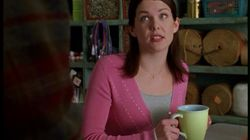

now playing The Lorelais' First Day at Chilton


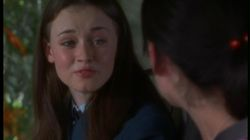

now playing Kill Me Now


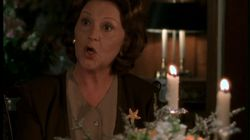

In [7]:
first_show.watch()

In [8]:
show_2 = Series()
show_2.get_info()

now playing The BoJack Horseman Story, Chapter One


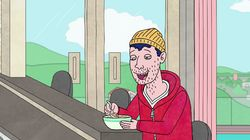

now playing BoJack Hates the Troops


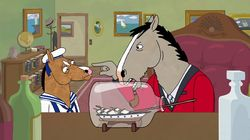

now playing Prickly-Muffin


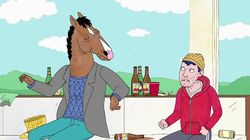

In [9]:
show_2.watch()

In [57]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        self.premiere = ""
        
    #add_user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name your new user? ")
        self.users.append(name)
        self.choose_user()
    
    #choose_user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
                
    #add_to_watch_list
    def add_to_watch_list(self, query = ""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist!")
    
    #choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            
        watch = input("What do you want to watch? ")
        
        for series in self.watch_list:
            if series.title.lower() == watch.lower().strip():
                series.play()
        response = input(f"{watch} is not in your watch list... Would you like to add it? y/N")
        
        if response in ('yes', 'y'):
            self.add_to_watch_list(watch)
            self.watch_list[-1].play()
    
    def premiereData(self):
        show = Series()
        data = None
        while not data:
            findShow = input("What show do you want to look up? ")
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={findShow}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series error: status code {r.status_code}")

        self.id = data['id']
               
                
        #API call for premiere date
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}')
        if r.status_code == 200:
            cast = r.json()
            self.premiere = data['premiered']
            print(f"{(findShow).title()} premiered on: {self.premiere}")
        else:
            print(f"Error: status code {r.status_code}")
            return
        
        
        
    #run
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch - Pick something from your watch list
            Add - add a new user
            Premiere Data - Find when a show premiered
            quit - close the app           
        
        """)
        
        while True:
            response = input("What would you like to do? (search, watch, add, find premiere data, quit)")
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "premiere data":
                self.premiereData()
            elif response.lower() == "quit":
                print(f"Thanks for watching, {(self.current_user).title()}!")
                break
            else:
                print("Incorrect input... Try again!")

    


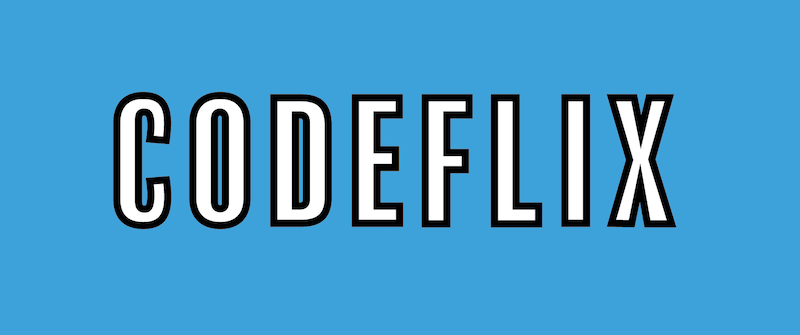

Users: 
beck
beck

            What would you like to do?
            
            Search - Search for shows
            Watch - Pick something from your watch list
            Add - add a new user
            Premiere Data - Find when a show premiered
            quit - close the app           
        
        
Thanks for watching, Beck!


In [56]:
myShow = Theater()

myShow.run()
        

##  Exercise 1:
Discuss what other classes we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [ ]:
#I added the premiereData method into the Theater class! 
# I'm always curious when a show aired for the first time, so this may be specifically just for me.